Author: Mphaga Philelo

Domain: Data Science

Batch: June

Task: SALES PREDICTION USING PYTHON 

Aim: sales prediction using machine learning in Python


1.Data and Importating Important Libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
T4data = pd.read_csv('advertising.csv')
T4data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
# Dataset Rows & Columns count
T4data.shape

(200, 4)

In [13]:
# Dataset Info
T4data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
# Dataset Duplicate Value Count
num_duplicate_rows = T4data.duplicated().sum()

# Display the number of duplicate rows
print("Number of Duplicate Rows in the df dataset:", num_duplicate_rows)

Number of Duplicate Rows in the df dataset: 0


In [20]:
# Missing Values/Null Values Count
missing_values_count = T4data.isnull().sum()
# Display the missing values count for each column
print("Missing Values Count:")
print(missing_values_count)

Missing Values Count:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


2.Understanding Your Variables

In [23]:
# Dataset Columns
T4data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [25]:
# Dataset Describe
T4data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


3.Exploratory data Analysis

C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


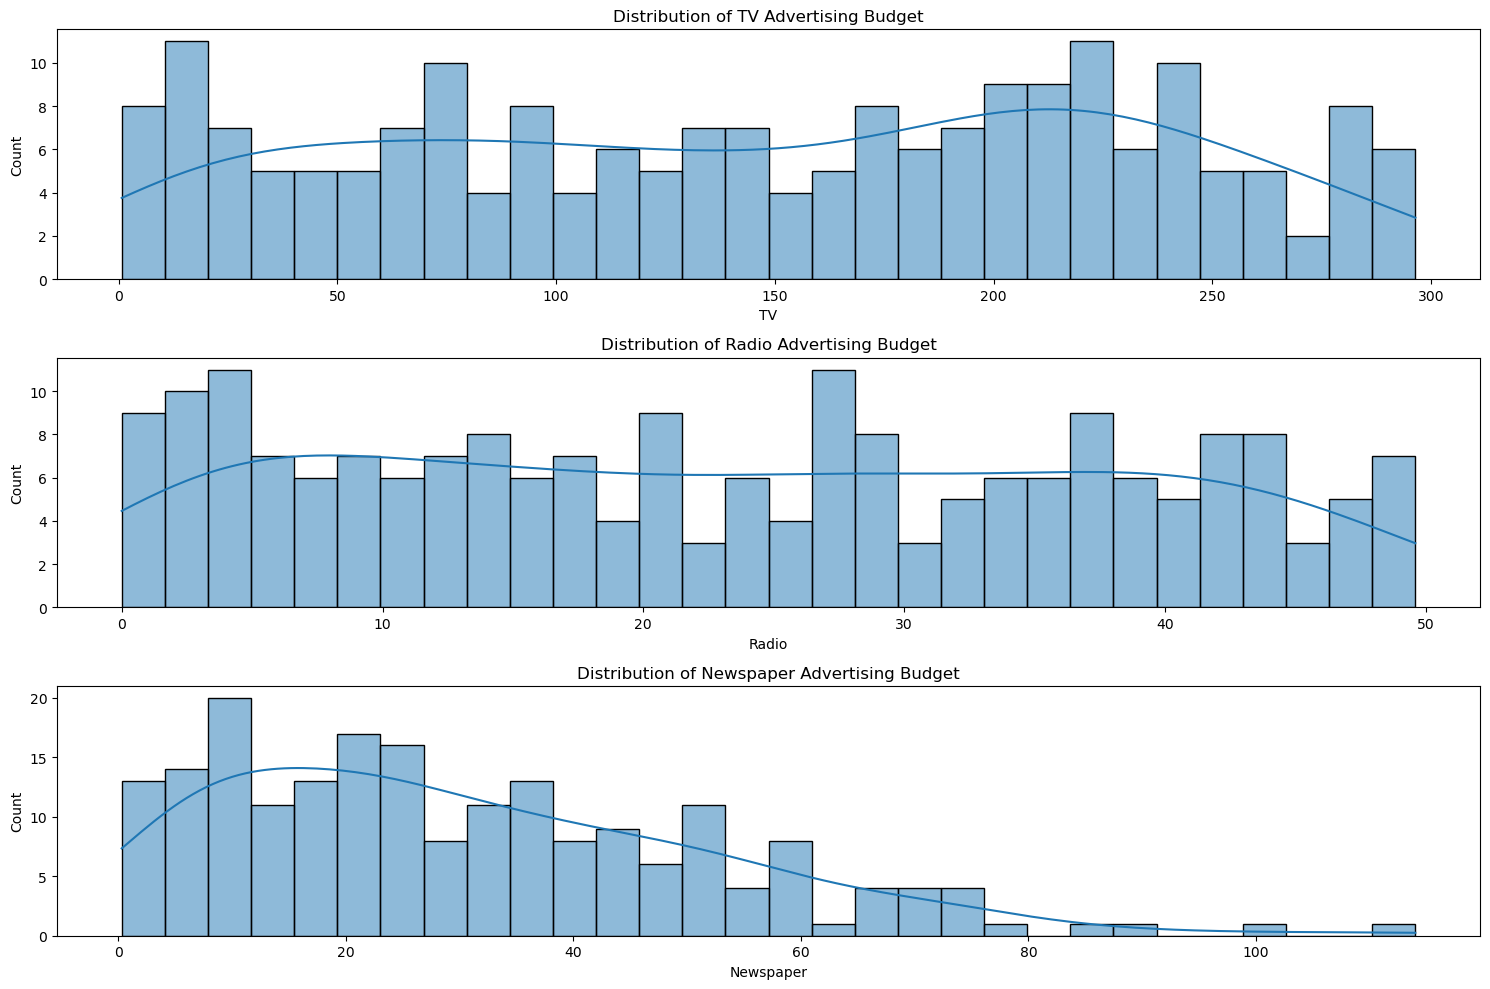

In [28]:
# Univariate Analysis
plt.figure(figsize=(15, 10))

# Distribution of TV advertising budget
plt.subplot(3, 1, 1)
sns.histplot(T4data['TV'], bins=30, kde=True)
plt.title('Distribution of TV Advertising Budget')

# Distribution of Radio advertising budget
plt.subplot(3, 1, 2)
sns.histplot(T4data['Radio'], bins=30, kde=True)
plt.title('Distribution of Radio Advertising Budget')

# Distribution of Newspaper advertising budget
plt.subplot(3, 1, 3)
sns.histplot(T4data['Newspaper'], bins=30, kde=True)
plt.title('Distribution of Newspaper Advertising Budget')

plt.tight_layout()
plt.show()

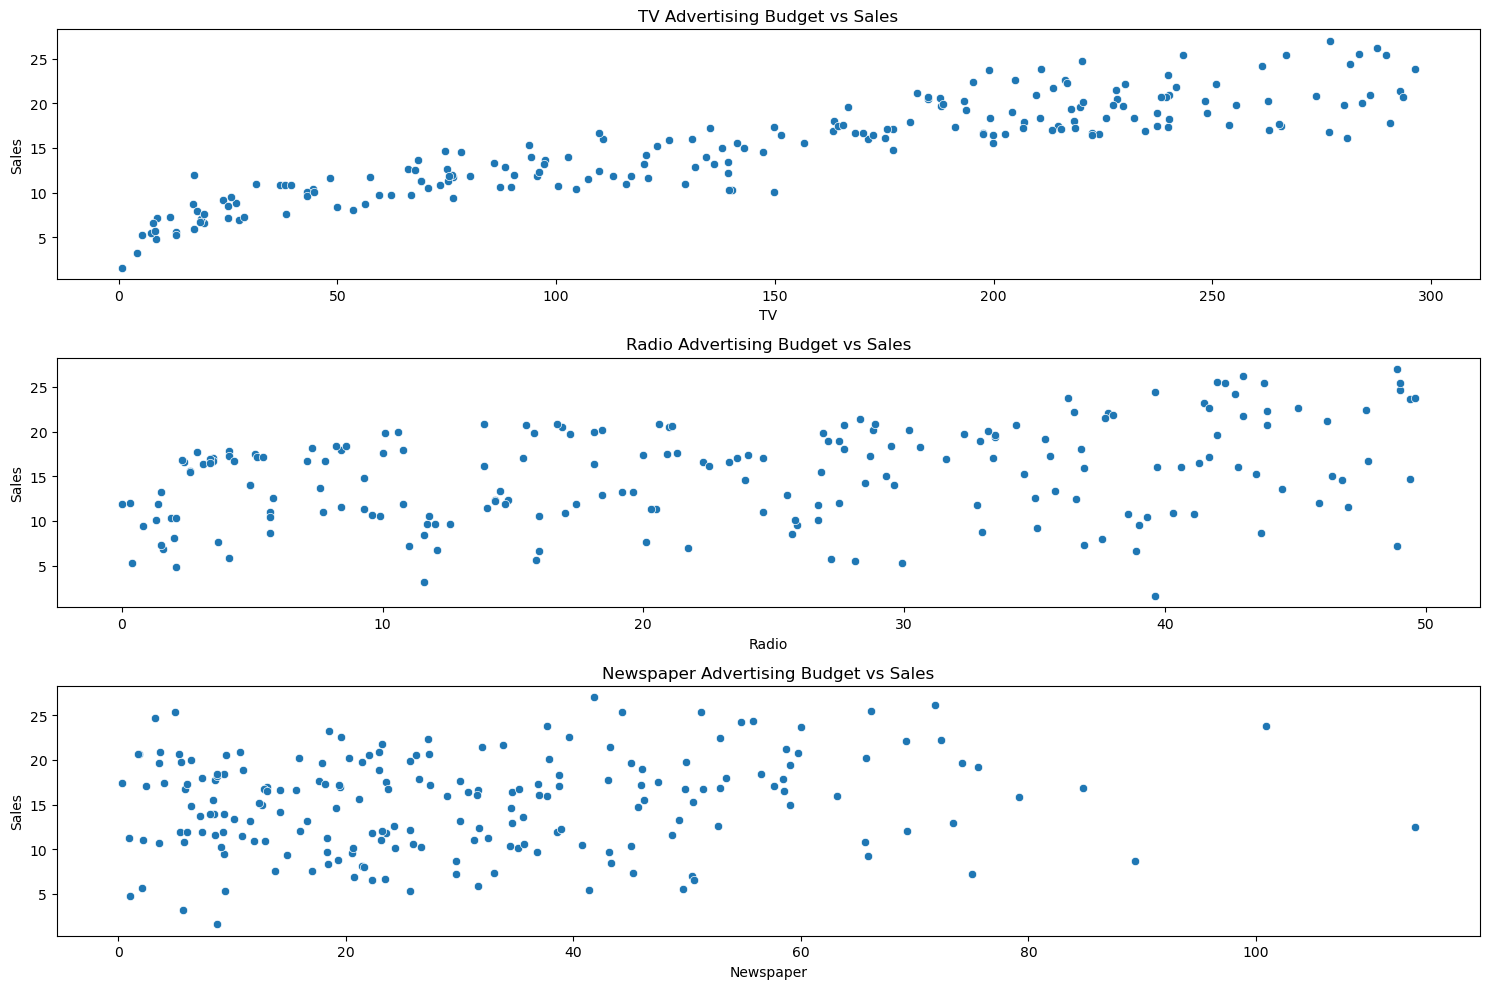

In [29]:

# Bivariate Analysis
plt.figure(figsize=(15, 10))

# Scatter plot TV vs Sales
plt.subplot(3, 1, 1)
sns.scatterplot(x='TV', y='Sales', data=T4data)
plt.title('TV Advertising Budget vs Sales')

# Scatter plot Radio vs Sales
plt.subplot(3, 1, 2)
sns.scatterplot(x='Radio', y='Sales', data=T4data)
plt.title('Radio Advertising Budget vs Sales')

# Scatter plot Newspaper vs Sales
plt.subplot(3, 1, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=T4data)
plt.title('Newspaper Advertising Budget vs Sales')

plt.tight_layout()
plt.show()

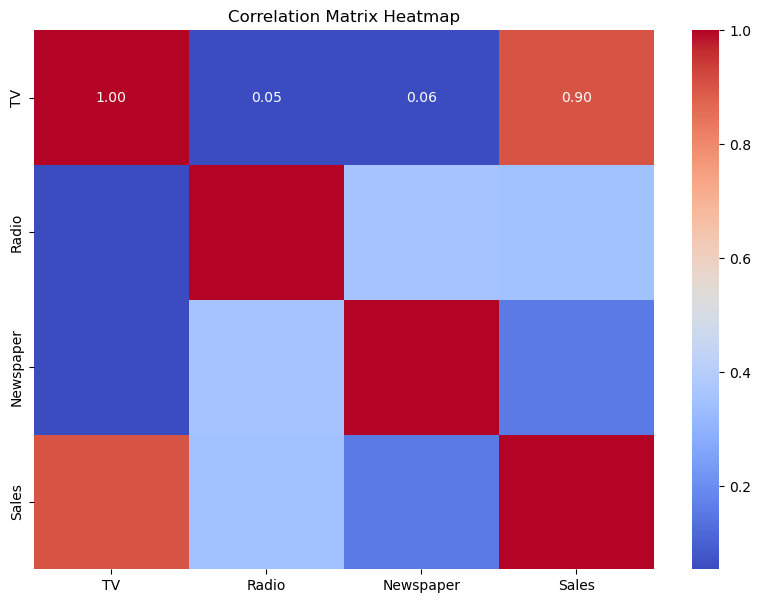

In [31]:
# Calculate the correlation matrix
corr_matrix = T4data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

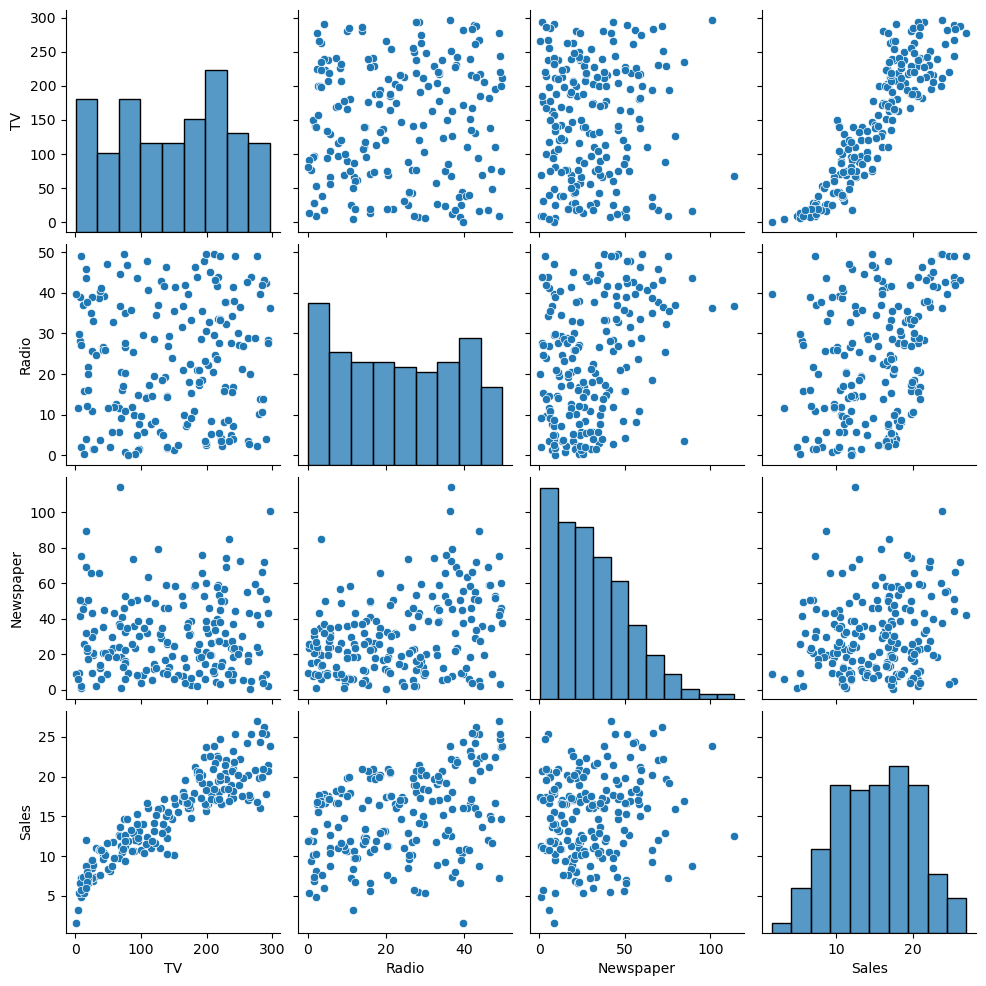

In [34]:
# Multivariate Analysis
sns.pairplot(T4data)
plt.show()

4.Model Building

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate features and target variable
X = T4data.drop('Sales', axis=1)
y = T4data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [38]:
X_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


5.Model Evaluation

In [54]:
# Predict on the test set using Linear Regression model
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model Evaluation:')
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('R-squared:', r2_lr)

Linear Regression Model Evaluation:
MAE: 1.274826210954934
MSE: 2.907756910271091
R-squared: 0.9059011844150826


In [56]:
lr_model.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [58]:
lr_model.intercept_

4.714126402214134

In [60]:
(0.05450927 + 0.10094536 + 0.00433665) * 69.2 + 4.714126402214134

15.771682978214134

C:\Users\d\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


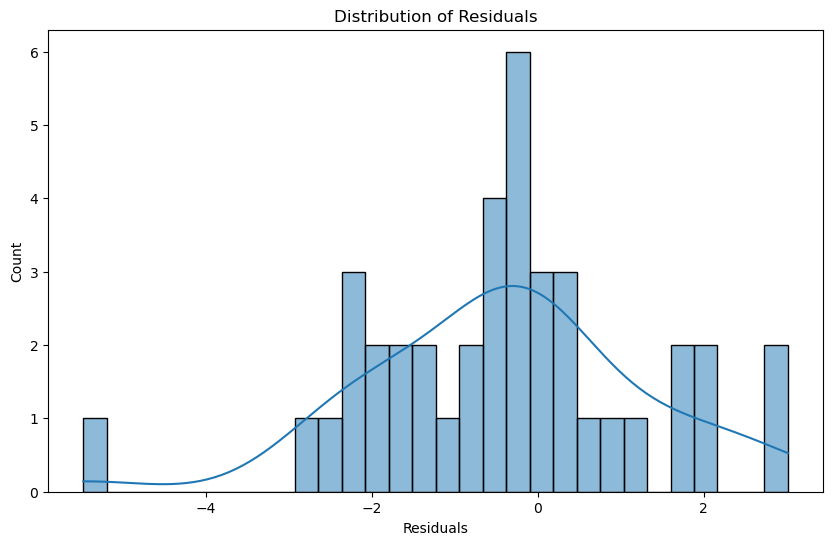

In [62]:
# Plot the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred_lr, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Conclusion
In this project, I built a linear regression model to predict sales based on advertising budgets across TV, radio, and newspapers. Through exploratory data analysis (EDA), I identified relationships between these features and sales.My model achieved an R-squared value of 0.9059011844150826, indicating the proportion of variance in sales explained by the model. This analysis provides insights into how different advertising channels impact sales.